# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier


---
## Step 0: Load The Data

In [2]:
import random
import numpy as np
import matplotlib.pyplot as plt
import cv2
from sklearn.utils import shuffle
from skimage import exposure

%matplotlib inline


In [94]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file ='../data/train.p'
validation_file='../data/valid.p'
testing_file = '../data/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Summary of the Data Set 

In [4]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

# TODO: Number of training examples
n_train = len(X_train)

# TODO: Number of validation examples
n_validation = len(X_valid)

# TODO: Number of testing examples.
n_test = len(X_test)

# TODO: What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes =   len(set(y_train))

print("Number of training examples =", n_train)
print("Number of validation examples= ",n_validation)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of validation examples=  4410
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


### Exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 


**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

In [5]:
import pandas as pd 
data= pd.read_csv("signnames.csv") 
data.head()

,ClassId,SignName
0,0,Speed limit (20km/h)
1,1,Speed limit (30km/h)
2,2,Speed limit (50km/h)
3,3,Speed limit (60km/h)
4,4,Speed limit (70km/h)


In [69]:
labels_names=np.array(data['SignName'])

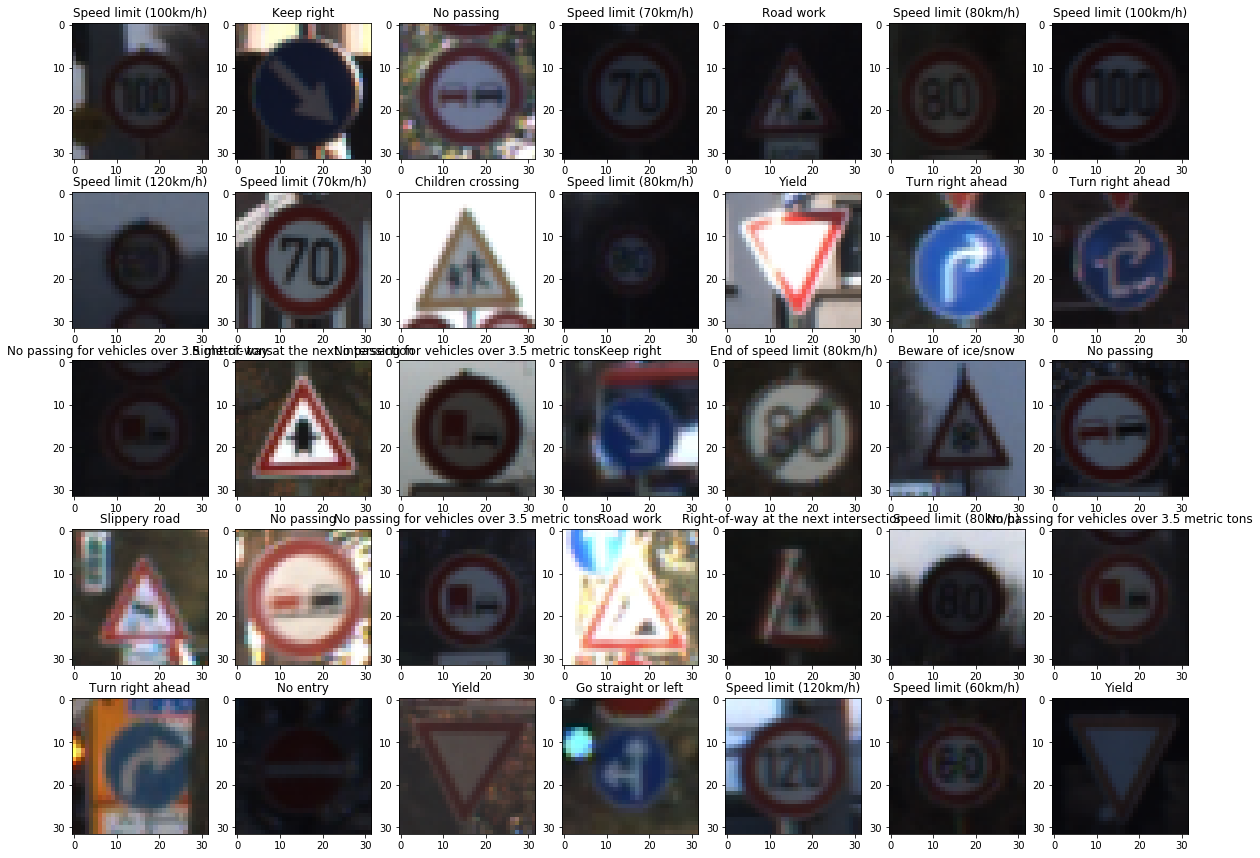

In [7]:
### Data exploration visualization code goes here.
##numpy.squeeze() function is used when we want to remove single-dimensional entries from the shape of an array.
columns = 7
rows = 5
fig=plt.figure(figsize=(20,15))
for i in range(1, columns*rows +1):
    index = random.randint(0, len(X_train))
    image = X_train[index].squeeze()
    fig.add_subplot(rows, columns, i)
    plt.imshow(image)
    plt.title(labels_names[y_train[index]])
#plt.savefig("plots/vis.png")
plt.show()

In [8]:
import warnings
#Histogram equalization
def adaptive_histogram_equalization(X_data):
    r = X_data[:, :, :, 0]
    g = X_data[:, :, :, 1]
    b = X_data[:, :, :, 2]
    #YCbCr
    y_channel = .299 * r + .587 * g + .114 * b
    #normalization
    y_channel= (y_channel / 255.).astype(np.float32)
    for i in range(y_channel.shape[0]):
        if i%1000==0:
            print(i)
        y_channel[i] =exposure.equalize_adapthist(y_channel[i])
        
    #,1-(32,32,1)
    #optional ->just preparing input for first convolutional layer
    X = y_channel.reshape(y_channel.shape + (1,)) 
    return X

    return X
def histograms_equalization(X_data):
    r = X_data[:, :, :, 0]
    g = X_data[:, :, :, 1]
    b = X_data[:, :, :, 2]
    #YCbCr
    y_channel = .299 * r + .587 * g + .114 * b
    print(y_channel.shape)
    #normalization
    y_channel= (y_channel / 255.).astype(np.float32)
    for i in range(y_channel.shape[0]):
        y_channel[i] = exposure.equalize_hist(y_channel[i])
    #,1-(32,32,1)
    X = y_channel.reshape(y_channel.shape + (1,)) 
    return X

def to_gray(X_data):
    r = X_data[:, :, :, 0]
    g = X_data[:, :, :, 1]
    b = X_data[:, :, :, 2]
    #YCbCr
    gray = .299 * r + .587 * g + .114 * b
    gray= (gray / 255.).astype(np.float32)
    gray=gray.reshape(gray.shape +(1,))
    print(gray.shape)
    return gray

In [90]:
X_train.shape

(34799, 32, 32, 1)

In [95]:
X=np.copy(X_train[200:221,:,:,:,])
X1=np.copy(X_train[200:221,:,:,:,])
X2=np.copy(X_train[200:221,:,:,:,])
X3=np.copy(X_train[200:221,:,:,:,])

In [96]:
X.shape

(21, 32, 32, 3)

In [97]:
X1=adaptive_histogram_equalization(X1)

0


/opt/conda/lib/python3.6/site-packages/skimage/util/dtype.py:141: UserWarning: Possible precision loss when converting from float32 to uint16
  .format(dtypeobj_in, dtypeobj_out))


In [98]:
X2=histograms_equalization(X2)

(21, 32, 32)


In [99]:
X3=to_gray(X3)

(21, 32, 32, 1)


In [100]:
X3[1].shape

(32, 32, 1)

In [101]:
X2.shape

(21, 32, 32, 1)

In [102]:
from IPython.display import Markdown, display
def printmd(string):
    display(Markdown(string))


<center><h3>Original images</center></h3>

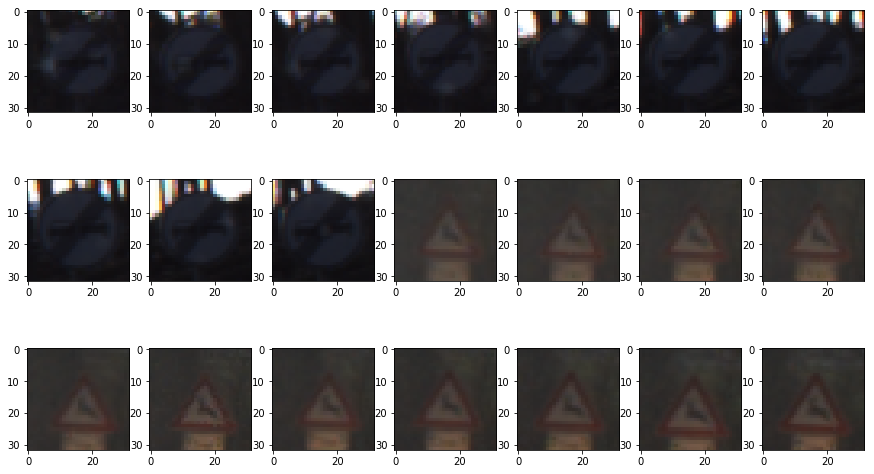

In [107]:
printmd('<center><h3>Original images</center></h3>')
fig = plt.figure(figsize=(15, 15))
for i in range(X.shape[0]):
    ax = fig.add_subplot(5, 7, i + 1)
    ax.imshow(X[i].squeeze())
plt.savefig('plots/original.png')
plt.show()

#### As we seen some images displayed have a low constrast and a bad ilumination. This is the first problem witch can affect accuracy of a trained model with these data


### Pre-process the Data Set (normalization, grayscale, etc.)

In [104]:
from IPython.display import Markdown, display
def printmd(string):
    display(Markdown(string))


<center><h3> Grayscale Transformation</center></h3>

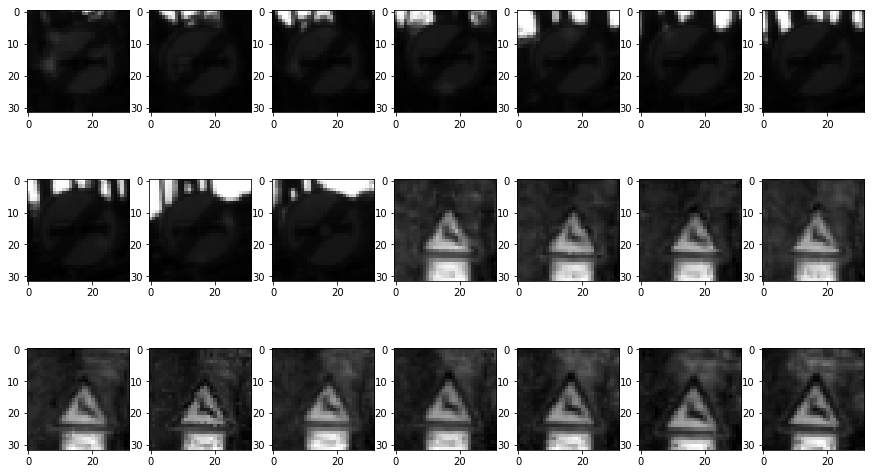

In [108]:
fig = plt.figure(figsize=(15, 15))
printmd('<center><h3> Grayscale Transformation</center></h3>')
#fig.suptitle('This is a somewhat long figure title', fontsize=10)
for i in range(X3.shape[0]):
    ax = fig.add_subplot(5, 7, i + 1)
    ax.imshow(X3[i].reshape(32, 32), cmap='gray')
plt.savefig('plots/grayscale.png')
plt.show()


<center><h3> Histogram Equalization</center></h3>

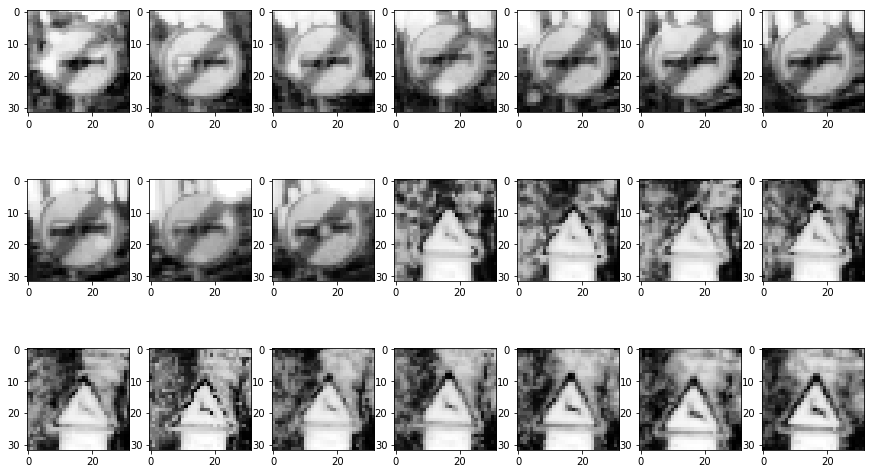

In [109]:
printmd('<center><h3> Histogram Equalization</center></h3>')
fig = plt.figure(figsize=(15, 15))
for i in range(X2.shape[0]):
    ax = fig.add_subplot(5, 7, i + 1)
    ax.imshow(X2[i].reshape(32, 32), cmap='gray')
plt.savefig('plots/his_equa.png')
plt.show()

<center><h3>Adaptive histogram equalization</center></h3>

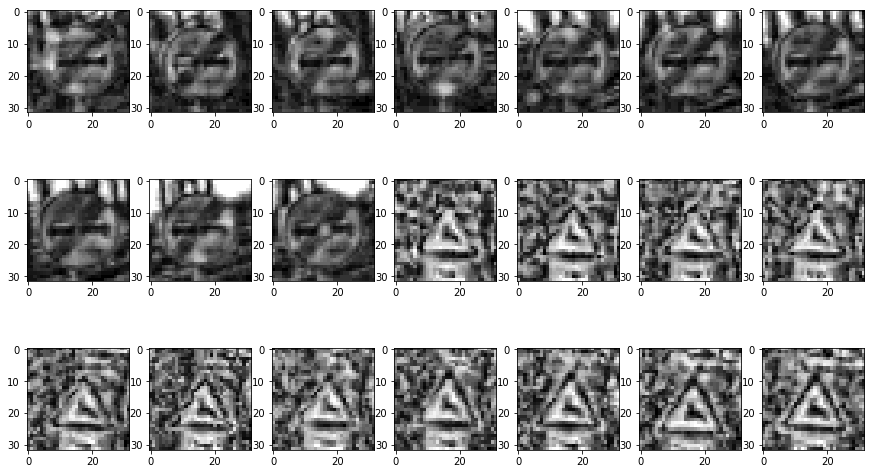

In [110]:
printmd('<center><h3>Adaptive histogram equalization</center></h3>')
fig = plt.figure(figsize=(15, 15))
for i in range(X1.shape[0]):
    ax = fig.add_subplot(5, 7, i + 1)
    ax.imshow(X1[i].reshape(32, 32), cmap='gray')
plt.savefig('plots/adaptive.png')
plt.show()

# Distribution of classes in the training, validation and test set.

In [23]:
#import collections
#n_signs=np.array(collections.Counter(y_train))

In [24]:
#n_signs

In [114]:
def plot_bar(y_data,title):
    sign_nr, counter = np.unique(y_data, return_counts=True)
    plt.figure(figsize=(12,5))
    plt.bar(sign_nr, counter)
    plt.grid()
    plt.title(title)
    plt.xticks(np.arange(0, 43, step=1))
    plt.savefig('plots/test_bar.png')
    plt.show()

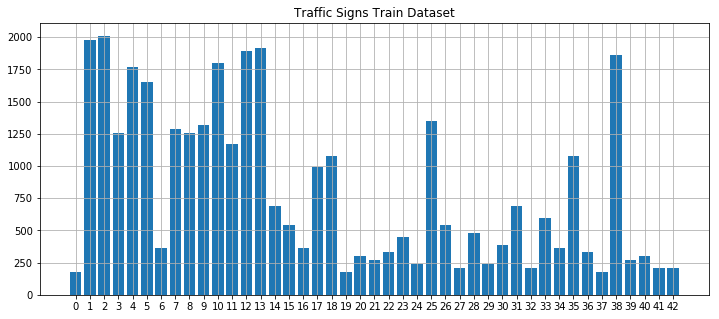

In [112]:
plot_bar(y_train,"Traffic Signs Train Dataset")

In [113]:
print('Most occurred examples: ',labels_names[1])
print('                        ',labels_names[2])
print('                        ',labels_names[4])
print('                        ',labels_names[5])
print('                        ',labels_names[10])
print('                        ',labels_names[12])
print('                        ',labels_names[13])
print('                        ',labels_names[38])


Most occurred examples:  Speed limit (30km/h)
                         Speed limit (50km/h)
                         Speed limit (70km/h)
                         Speed limit (80km/h)
                         No passing for vehicles over 3.5 metric tons
                         Priority road
                         Yield
                         Keep right


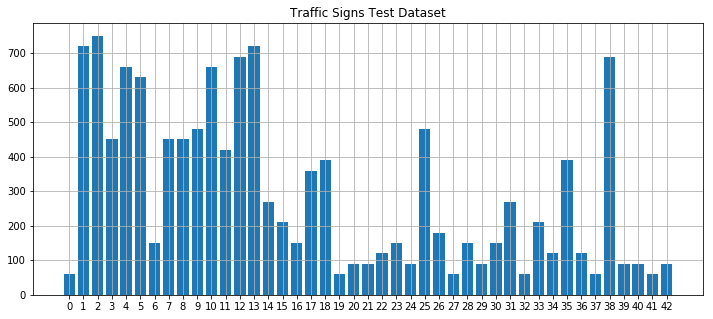

In [115]:
plot_bar(y_test,"Traffic Signs Test Dataset")

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

In [29]:
from sklearn.utils import shuffle

#X_train, y_train = shuffle(X_train, y_train)

In [30]:
#X_train=histograms_equalization(X_train)

In [31]:
#X_valid=histograms_equalization(X_valid)
#X_test=histograms_equalization(X_test)

In [32]:
#X_train=to_gray(X_train)
X_train=adaptive_histogram_equalization(X_train)

0


/opt/conda/lib/python3.6/site-packages/skimage/util/dtype.py:141: UserWarning: Possible precision loss when converting from float32 to uint16
  .format(dtypeobj_in, dtypeobj_out))


1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000
31000
32000
33000
34000


In [33]:
X_valid=adaptive_histogram_equalization(X_valid)

0


/opt/conda/lib/python3.6/site-packages/skimage/util/dtype.py:141: UserWarning: Possible precision loss when converting from float32 to uint16
  .format(dtypeobj_in, dtypeobj_out))


1000
2000
3000
4000


In [34]:
#X_valid=to_gray(X_valid)
#X_test=to_gray(X_test)
#X_valid=adaptive_histogram_equalization(X_valid)
X_test=adaptive_histogram_equalization(X_test)

0


/opt/conda/lib/python3.6/site-packages/skimage/util/dtype.py:141: UserWarning: Possible precision loss when converting from float32 to uint16
  .format(dtypeobj_in, dtypeobj_out))


1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000


In [35]:
X_train.shape

(34799, 32, 32, 1)

### Model Architecture

In [39]:
import tensorflow as tf
from tensorflow.contrib.layers import flatten

EPOCHS = 14
BATCH_SIZE=32 #128  #64

In [40]:

from tensorflow.contrib.layers import flatten

def LeNet(x):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    
    # SOLUTION: Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 1, 6), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(6))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    # SOLUTION: Activation.
    conv1 = tf.nn.relu(conv1)

    # SOLUTION: Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Layer 2: Convolutional. Output = 10x10x16.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
    # SOLUTION: Activation.
    conv2 = tf.nn.relu(conv2)

    # SOLUTION: Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    

    # SOLUTION: Flatten. Input = 5x5x16. Output = 400.
    fc0   = flatten(conv2)
    
    # SOLUTION: Layer 3: Fully Connected. Input = 400. Output = 120.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(400, 120), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(120))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
    # SOLUTION: Activation.
    fc1    = tf.nn.relu(fc1)

    # SOLUTION: Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(84))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    
    # SOLUTION: Activation.
    fc2    = tf.nn.relu(fc2)

    # SOLUTION: Layer 5: Fully Connected. Input = 84. Output = 10.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(84, 43), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(43))
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    
    return logits

## Features and Labels

In [41]:
#x is a placeholder for a batch of input images. y is a placeholder for a batch of output labels.
x = tf.placeholder(tf.float32, (None, 32, 32, 1))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, 43)

## Training Pipeline
Create a training pipeline that uses the model to classify 

In [42]:
rate = 0.001

logits = LeNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

## Model Evaluation

In [43]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

## Train the Model

In [46]:
x_train_acc=[]
x_valid_acc=[]
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y})
            
        validation_accuracy = evaluate(X_valid, y_valid)
        train_accuracy =  evaluate(X_train, y_train)
        x_train_acc.append(train_accuracy)
        x_valid_acc.append(validation_accuracy)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    saver.save(sess, './lenet')
    print("Model saved")

Training...

EPOCH 1 ...
Validation Accuracy = 0.875

EPOCH 2 ...
Validation Accuracy = 0.918

EPOCH 3 ...
Validation Accuracy = 0.936

EPOCH 4 ...
Validation Accuracy = 0.920

EPOCH 5 ...
Validation Accuracy = 0.941

EPOCH 6 ...
Validation Accuracy = 0.927

EPOCH 7 ...
Validation Accuracy = 0.936

EPOCH 8 ...
Validation Accuracy = 0.922

EPOCH 9 ...
Validation Accuracy = 0.940

EPOCH 10 ...
Validation Accuracy = 0.934

EPOCH 11 ...
Validation Accuracy = 0.946

EPOCH 12 ...
Validation Accuracy = 0.918

EPOCH 13 ...
Validation Accuracy = 0.949

EPOCH 14 ...
Validation Accuracy = 0.950

Model saved


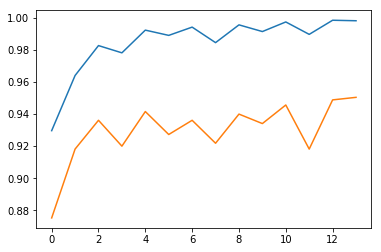

In [47]:
plt.plot(x_train_acc)
plt.plot(x_valid_acc)
plt.show()

## Evaluate the Model
Once you are completely satisfied with your model, evaluate the performance of the model on the test set.


In [48]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

INFO:tensorflow:Restoring parameters from ./lenet
Test Accuracy = 0.931


---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Predict the Sign Type for Each Image

In [53]:
import os
test_images=os.listdir('images')
test_images

['4.JPG', '1.png', '3.png', '2.JPG', '5.png']

In [54]:
import os
import matplotlib.image as mpimg

n_images=len(test_images)
X5= np.zeros((n_images,32,32,3))

for i in range(n_images):
    image= mpimg.imread('images/'+test_images[i])
    X5[i]= np.array(image)
    #plt.imshow(X[0])


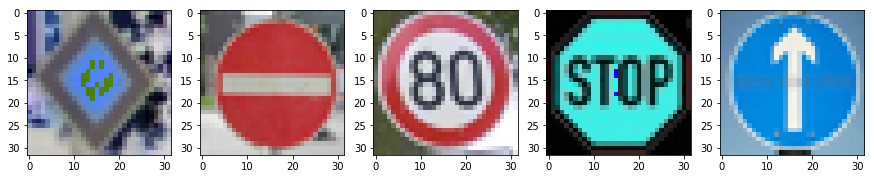

In [57]:
fig = plt.figure(figsize=(15, 15))
for i in range(X5.shape[0]):
    ax = fig.add_subplot(1, 5, i + 1)
    ax.imshow(X5[i].squeeze())
plt.show()

In [58]:
Y5 = np.array([12,17,5,14,35])

In [59]:
X5=adaptive_histogram_equalization(X5)

0


/opt/conda/lib/python3.6/site-packages/skimage/util/dtype.py:141: UserWarning: Possible precision loss when converting from float32 to uint16
  .format(dtypeobj_in, dtypeobj_out))


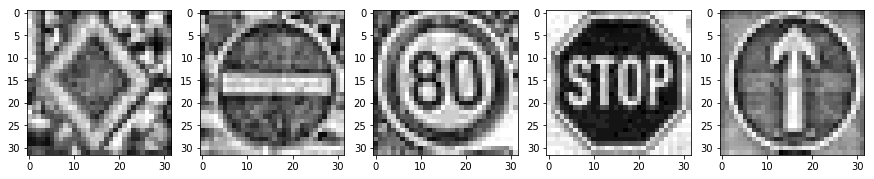

In [61]:
fig = plt.figure(figsize=(15, 15))
for i in range(X5.shape[0]):
    ax = fig.add_subplot(1, 5, i + 1)
    ax.imshow(X5[i].reshape(32, 32), cmap='gray')
plt.show()

### Analyze Performance

In [63]:
with tf.Session() as sess:
    
    sess.run(tf.global_variables_initializer())
    saver2 = tf.train.import_meta_graph('./lenet.meta')
    saver2.restore(sess, "./lenet")
    test_accuracy = evaluate(X5, Y5)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

INFO:tensorflow:Restoring parameters from ./lenet
Test Accuracy = 1.000


### Top 5 Softmax Probabilities For Each Image Found on the Web

In [65]:
with tf.Session() as sess:
    
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    a = sess.run(tf.nn.softmax(logits), feed_dict={x: X5})  
    sofmax_prob=sess.run(tf.nn.top_k(a, k=5))
    

INFO:tensorflow:Restoring parameters from ./lenet


In [88]:
sofmax_prob.indices

array([[12, 40, 17,  9, 32],
       [17, 22,  9, 41, 40],
       [ 5,  1,  2,  6, 38],
       [14, 18, 26, 13,  5],
       [35, 36, 20, 40, 28]], dtype=int32)

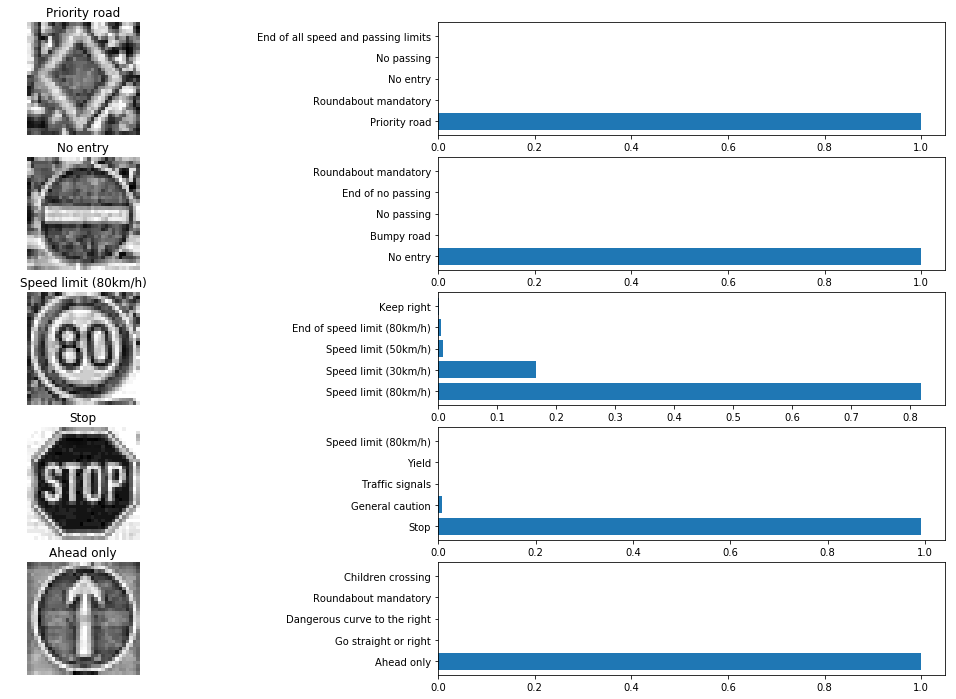

In [87]:

plt.figure(figsize=(20, 12))
for i in range(n_images):
    plt.subplot(5, 2, 2*i+1)
    plt.imshow(X5[i].reshape(32, 32), cmap='gray') 
    plt.title(labels_names[Y5[i]])
    plt.axis('off')
    plt.subplot(n_images, 2, 2*i+2)
    plt.barh(np.arange(1, 6, 1),sofmax_prob.values[i, :])
    labels = [labels_names[j] for j in sofmax_prob.indices[i]]
    plt.yticks(np.arange(1, 6,1), labels)
plt.savefig('plots/softmax_5.png')
plt.show()

In [ ]:
'''
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")'''